In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [42]:
X_train_data = np.load('X_kannada_MNIST_train.npz')
X_train = X_train_data['arr_0']


In [43]:
y_train_data = np.load('y_kannada_MNIST_train.npz')
y_train = y_train_data['arr_0']



In [44]:
X_test_data = np.load('X_kannada_MNIST_test.npz')
X_test = X_test_data['arr_0']


In [45]:
y_test_data = np.load('y_kannada_MNIST_test.npz')
y_test = y_test_data['arr_0']

In [46]:
X_train.shape

(60000, 28, 28)

In [47]:
y_train.shape

(60000,)

In [48]:
X_test.shape

(10000, 28, 28)

In [49]:
y_test.shape

(10000,)

In [50]:
X_train_reshape = X_train.reshape(X_train.shape[0], 784)
X_test_reshape = X_test.reshape(X_test.shape[0], 784)


In [51]:
X_train_reshape.shape

(60000, 784)

In [52]:
X_train_reshape

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [53]:
X_test_reshape

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [54]:
x_train = pd.DataFrame(X_train_reshape)
x_test = pd.DataFrame(X_test_reshape)


In [55]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# ploting the hand written image randomly

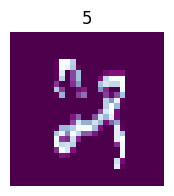

In [57]:
def plot_random_digit():
  random_index = np.random.randint(0,X_train.shape[0])
  plt.imshow(X_train[random_index], cmap='BuPu_r')
  plt.title(y_train[random_index])
  plt.axis('off')
plt.figure(figsize=[2,2])
plot_random_digit()

## performing PCA to 30 components.

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
x_train_pca = pd.DataFrame(x_train_pca)
x_test_pca = pd.DataFrame(x_test_pca)



In [59]:
x_train_pca

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,603.287390,-265.967108,29.543538,-322.437767,297.645914,124.932904,-101.679283,-40.166925,381.196847,-189.128322,...,-95.243171,-77.440611,-78.318012,-93.865493,-34.802269,-237.233100,101.310762,82.745243,-114.519730,-48.804026
1,298.508142,-97.544829,53.099861,-549.041927,42.398245,-313.902363,-219.932853,244.027682,253.385848,261.310804,...,-24.623460,58.158366,-214.389144,136.379767,-85.469756,2.759201,339.081777,-133.651455,-119.227383,-190.228269
2,-425.622137,646.150362,433.612090,-152.566128,162.643193,195.897640,43.392897,-399.669401,347.045620,-129.366721,...,90.513309,102.287281,155.644439,-29.437916,260.174792,105.543843,22.085286,-88.463013,161.146426,-25.206260
3,-343.828555,100.668065,-415.924038,-8.474111,-103.484764,152.569609,-97.505764,-270.095518,-17.728724,158.520621,...,0.944187,66.319294,141.372328,26.637154,-28.455726,72.217110,-45.864646,78.989101,75.982188,-126.804635
4,-96.056321,3.559569,-516.641373,125.602619,22.230624,80.809147,69.481388,-86.867106,158.589119,180.547207,...,195.859998,-130.003438,16.525407,-285.784360,83.094078,0.610990,-26.495241,-230.623496,90.426052,152.825557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-210.913976,384.412699,741.318194,144.939372,-227.952580,1.585661,337.743141,56.541682,-338.246205,-4.598517,...,47.475998,-139.779335,248.877108,65.780403,-139.782730,69.444027,-27.852243,-174.532151,172.293411,113.136501
59996,-411.839792,45.667473,127.140872,-205.793842,-377.402354,-242.375235,121.600496,-321.724962,151.298405,65.732066,...,128.764496,-33.638484,66.400300,216.130225,-201.124421,72.254314,-96.655849,-42.488814,63.322534,-240.269512
59997,-568.865928,5.946114,470.637977,-351.488085,-287.227504,-116.243432,75.657215,-223.188633,149.735126,-164.304261,...,166.039629,131.967733,8.728275,-164.467157,206.178838,28.862144,-180.217869,69.823733,-36.524164,-4.955975
59998,771.741991,-105.780683,296.496999,460.848188,-471.924966,-82.691601,-108.210099,-84.284215,72.107750,89.829990,...,-91.016217,25.400009,149.028967,-98.097346,-71.716611,22.263131,113.332573,239.966569,-218.555561,-147.761854


In [60]:
x_test_pca

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,279.360127,-604.630947,-176.073283,-322.230843,749.389894,-78.005884,196.951792,238.720111,455.226936,-308.585540,...,-8.627862,-226.631769,-109.092034,145.481689,27.545705,293.099529,-76.979794,-55.312691,-47.972817,59.967981
1,68.689918,-153.316917,-59.929899,-475.447716,305.786413,-400.518572,21.664911,303.831881,470.765551,-30.872037,...,-164.737350,-115.879433,-125.503151,-165.216406,11.115386,-305.590923,-19.876427,141.930296,-16.462301,-56.595659
2,-173.920105,-101.756161,-158.922351,139.188832,564.144881,-69.084301,138.511708,398.030014,681.354969,252.057257,...,-75.886344,297.492369,-249.237801,-41.089050,137.964529,-323.082718,96.593599,64.701863,164.677337,-50.289846
3,-258.215992,62.586136,-502.917322,-5.869475,390.681564,14.057134,-170.726226,109.807091,242.551783,-162.980214,...,-78.865753,-79.710904,-232.640883,-102.680197,224.596064,11.267611,-110.943010,-209.496175,48.272617,-55.015361
4,-145.295068,51.348999,-517.376318,123.798519,140.383272,106.647837,156.060454,-316.208141,245.084269,151.570456,...,-27.485860,-19.464871,98.949962,-43.784047,-88.487712,33.751802,-66.670362,-299.036573,40.402258,-41.413016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,34.943983,102.682920,-382.820470,274.520380,-39.783712,-123.438899,234.988999,195.948886,48.749861,-77.962646,...,36.480540,-235.842410,-200.146617,55.236670,52.823035,26.020534,-108.524356,-65.152481,180.194319,-96.338259
9996,-508.251359,-177.757917,-130.086200,23.491422,-105.807587,139.529381,-38.965911,-70.702996,89.478089,359.071174,...,79.355673,-54.048900,151.875333,-92.191922,-158.096089,-70.338889,54.609687,15.750368,46.269123,-94.578667
9997,-541.203945,27.851742,55.254055,-84.474475,292.474873,185.019064,-75.188875,51.676359,86.088043,-0.991882,...,113.929417,52.166985,-369.561205,9.941167,-34.983943,41.642550,257.930328,115.637822,-188.146825,105.656059
9998,648.876451,-49.691679,161.243727,-162.887272,-336.359830,37.119129,260.116218,-26.042388,51.375121,135.166131,...,104.734139,86.419518,266.744179,134.145033,-70.279256,-76.859824,-30.195277,262.790345,-122.639139,4.837142


# Normalizing  the data

In [61]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(x_train_pca)
transformed_train_data = mm.transform(x_train_pca)
transformed_test_data = mm.transform(x_test_pca)
x_pca_train_trans = pd.DataFrame(transformed_train_data)
x_pca_test_trans = pd.DataFrame(transformed_test_data)

In [62]:
x_pca_train_trans.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.494385,0.352083,0.393206,0.441501,0.426625,0.469477,0.433481,0.429780,0.481283,0.493059,...,0.462375,0.435397,0.479602,0.454910,0.443321,0.464504,0.482796,0.471624,0.467660,0.466681
std,0.169977,0.137099,0.170133,0.142875,0.128648,0.133331,0.129761,0.135437,0.126805,0.123161,...,0.100935,0.115112,0.115841,0.118296,0.117345,0.114469,0.111382,0.117639,0.112893,0.113907
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.364023,0.263934,0.253559,0.345208,0.349895,0.369757,0.337725,0.331112,0.395653,0.410144,...,0.396802,0.356969,0.401876,0.374494,0.364393,0.388605,0.408901,0.392450,0.390861,0.391554
50%,0.503940,0.335521,0.385296,0.443891,0.429619,0.464237,0.432739,0.423804,0.479548,0.494811,...,0.464123,0.432247,0.481184,0.455146,0.440701,0.462170,0.485886,0.470689,0.466730,0.466640
75%,0.618434,0.405256,0.525669,0.535899,0.508288,0.568322,0.527390,0.521688,0.560960,0.577083,...,0.528157,0.511807,0.557889,0.536024,0.520140,0.539394,0.559539,0.548771,0.543786,0.542200
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## • K-NN Classifier model

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn_pca = KNeighborsClassifier()
params = {'n_neighbors': range(3,10),
          'weights':['uniform', 'distance'],
          'metric':['manhattan','eculidean','cosine']}
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
skf = StratifiedKFold(n_splits = 5)

rcv_knn = RandomizedSearchCV(knn_pca, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv_knn.fit(x_pca_train_trans, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['manhattan', 'eculidean',
                                                   'cosine'],
                                        'n_neighbors': range(3, 10),
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [64]:
rcv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5, 'metric': 'cosine'}

In [65]:
rcv_knn.best_score_

0.9664333333333334

In [66]:
finalmodel_knn_mnist = knn_pca.set_params(**rcv_knn.best_params_)
finalmodel_knn_mnist.fit(x_pca_train_trans, y_train)
knnpreds_mnist = finalmodel_knn_mnist.predict(x_pca_test_trans)

## Evaluation (KNN)

Precision: 0.9323724998343167
Recall: 0.9292
F1-score: 0.9289492515781468
Confusion Matrix:
[[821 151   1   9   5   0   0   0  10   3]
 [ 10 972   0   2   5   0   0   1   8   2]
 [  2   2 988   2   0   2   4   0   0   0]
 [  6   8   5 939  17  13   2  10   0   0]
 [  0   0   0   2 982   5   1   3   4   3]
 [  0   0   1   9  86 895   2   2   2   3]
 [  2   0   0   5  22   9 923  22   0  17]
 [  9   2   0  23  26   2  74 840   0  24]
 [ 16   3   0   0   2   4   0   0 970   5]
 [  1   9   0   0   8   1   6   2  11 962]]
AUC : 0.982050312222222


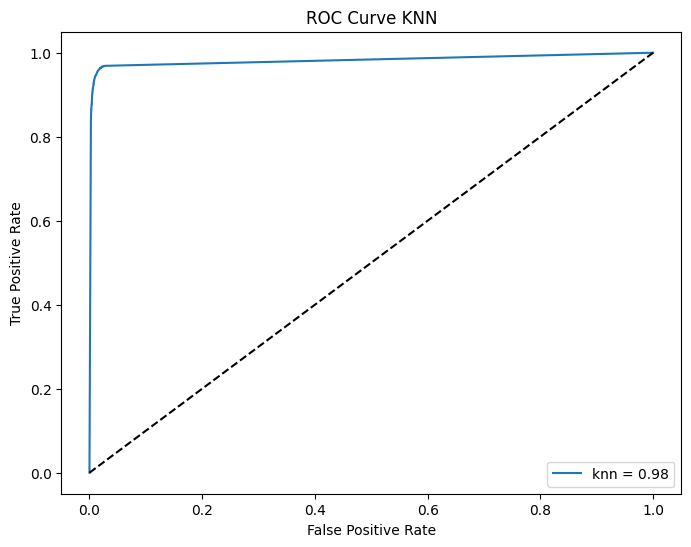

In [67]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, knnpreds_mnist,average = 'macro')
recall = recall_score(y_test, knnpreds_mnist,average = 'macro')
f1 = f1_score(y_test, knnpreds_mnist,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,knnpreds_mnist)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

#calculate AUC

from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_knn = finalmodel_knn_mnist.predict_proba(x_pca_test_trans)
fpr_knn,tpr_knn,thersholds_knn = roc_curve(y_test_bin.ravel(),predict_proba_knn.ravel())
auc = auc(fpr_knn,tpr_knn)

print("AUC :", auc)

# plotting ROC curve

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'knn = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve KNN')
plt.legend(loc='lower right')
plt.show()

## DECISION TREES

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
model =  DecisionTreeClassifier()

params = {'criterion':['gini','entropy'],
          'splitter':['best','random'],
          'max_depth':range(3,50),
          }

skf = StratifiedKFold(n_splits = 5)

rcv_dt = RandomizedSearchCV(model, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv_dt.fit(x_pca_train_trans, y_train)

rcv_dt.best_score_


0.8940166666666667

In [69]:
rcv_dt.best_params_

{'splitter': 'best', 'max_depth': 13, 'criterion': 'gini'}

In [70]:
finalmodel_dt_mnist = model.set_params(**rcv_dt.best_params_)
finalmodel_dt_mnist.fit(x_pca_train_trans, y_train)
dtpreds_mnist = finalmodel_dt_mnist.predict(x_pca_test_trans)

## EVALUATION (DECISION TREE)

Precision: 0.804361970986721
Recall: 0.8042
F1-score: 0.8029822222192875
Confusion Matrix:
[[708 173   6  28  10   2   3   6  46  18]
 [ 79 826   3  23   6  10   4   4  31  14]
 [  4   3 928  12   1  25   7   5   5  10]
 [ 29   8  14 774  25  23  27  78  15   7]
 [  5   1   2  34 845  49  17  13  16  18]
 [ 14   3   4  25 114 801   6   6  17  10]
 [ 13   2   5  34  28  29 812  56   2  19]
 [ 14  11   9  55  23   6 145 645  13  79]
 [ 37  15  16   6   7  19   2   0 883  15]
 [ 23  30   1   4  26   8   9   5  74 820]]
AUC: 0.9174504916666666


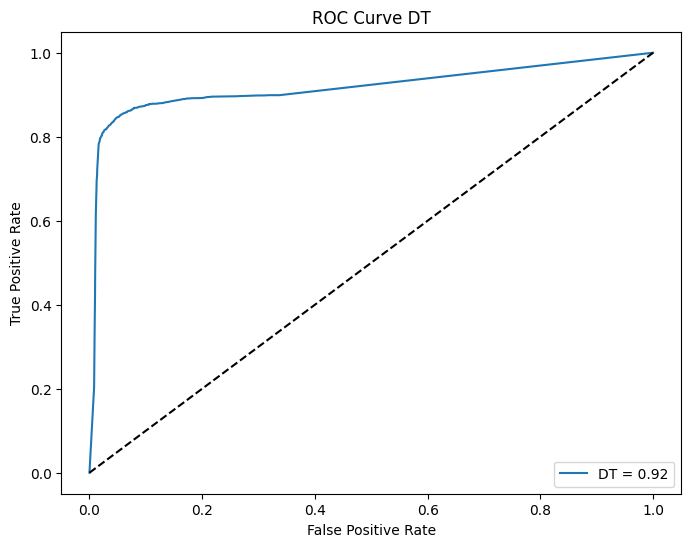

In [71]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, dtpreds_mnist,average = 'macro')
recall = recall_score(y_test, dtpreds_mnist,average = 'macro')
f1 = f1_score(y_test, dtpreds_mnist,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,dtpreds_mnist)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_dt =  finalmodel_dt_mnist.predict_proba(x_pca_test_trans)
fpr_dt,tpr_dt,thersholds_dt = roc_curve(y_test_bin.ravel(),predict_proba_dt.ravel())
auc = auc(fpr_dt,tpr_dt)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'DT = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve DT')
plt.legend(loc='lower right')
plt.show()


## RANDOM FOREST

# On non- normalized data

Precision: 0.9094106285945516
Recall: 0.9066000000000001
F1-score: 0.9060645051535332
Confusion Matrix:
[[807 143   2  20   3   0   2   1  15   7]
 [ 10 943   1  18   6   3   0   0  12   7]
 [  5   0 981   4   0   5   1   0   3   1]
 [  8   9   1 934  10  18   4  14   2   0]
 [  0   1   0  17 942  19   3   4   7   7]
 [  0   1   0  11  91 885   2   3   4   3]
 [  4   4   2  20  21  16 898  19   1  15]
 [  8   8   1  33  16   2 104 789   4  35]
 [ 17   3   1   0   3   3   0   1 970   2]
 [  4   7   0   0  15   0   7   2  48 917]]
AUC: 0.9939984555555557


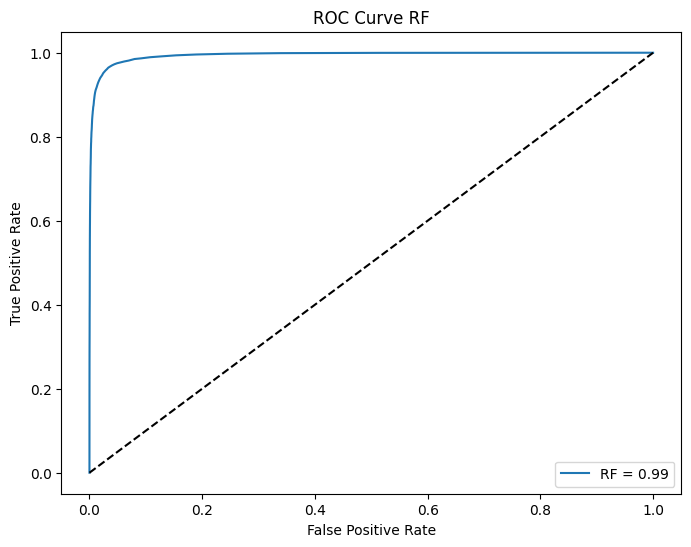

In [72]:
from sklearn.ensemble import RandomForestClassifier

rf_mnist = RandomForestClassifier()
rf_mnist.fit(x_train_pca, y_train)
rfpreds_mnist = rf_mnist.predict(x_test_pca)


## Evaluation
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, rfpreds_mnist,average = 'macro')
recall = recall_score(y_test, rfpreds_mnist,average = 'macro')
f1 = f1_score(y_test, rfpreds_mnist,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,rfpreds_mnist)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_rf = rf_mnist.predict_proba(x_test_pca)
fpr_rf,tpr_rf,thersholds_rf = roc_curve(y_test_bin.ravel(),predict_proba_rf.ravel())
auc = auc(fpr_rf,tpr_rf)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'RF = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RF')
plt.legend(loc='lower right')
plt.show()


# On Normalized data

Precision: 0.9072097722093885
Recall: 0.9042999999999999
F1-score: 0.9036329861321155
Confusion Matrix:
[[809 141   0  23   3   1   2   3  13   5]
 [ 11 936   1  21   7   3   0   0  14   7]
 [  4   1 980   4   0   7   1   1   2   0]
 [  9   6   1 932  12  16   5  17   2   0]
 [  0   1   0  18 942  19   3   3   8   6]
 [  0   1   0  11  97 876   2   4   6   3]
 [  3   4   2  16  20  21 898  16   1  19]
 [  7   8   1  38  16   2 105 772   3  48]
 [ 13   5   1   1   2   3   0   0 974   1]
 [  4   4   0   1   9   0   7   1  50 924]]
AUC: 0.9937133822222222


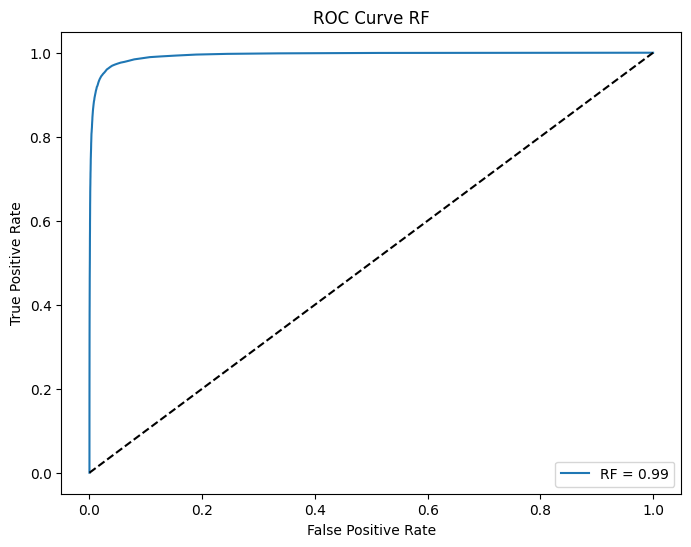

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf_mnist = RandomForestClassifier()
rf_mnist.fit(x_pca_train_trans, y_train)
rfpreds_mnist = rf_mnist.predict(x_pca_test_trans)


## Evaluation
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, rfpreds_mnist,average = 'macro')
recall = recall_score(y_test, rfpreds_mnist,average = 'macro')
f1 = f1_score(y_test, rfpreds_mnist,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,rfpreds_mnist)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_rf = rf_mnist.predict_proba(x_pca_test_trans)
fpr_rf,tpr_rf,thersholds_rf = roc_curve(y_test_bin.ravel(),predict_proba_rf.ravel())
auc = auc(fpr_rf,tpr_rf)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'RF = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RF')
plt.legend(loc='lower right')
plt.show()


# OPTIMIZED MODEL

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
rf_mnist = RandomForestClassifier()

params = {'criterion':['gini','entropy'],
          'n_estimators': range(1,10),
          'max_features':['sqrt', 'log2', None]
          # 'max_depth':range(3,50),
          }



skf = StratifiedKFold(n_splits = 10)

rcv = RandomizedSearchCV(rf_mnist, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv.fit(x_pca_train_trans, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': range(1, 10)},
                   scoring='accuracy')

In [75]:
rcv.best_params_

{'n_estimators': 8, 'max_features': 'sqrt', 'criterion': 'entropy'}

In [76]:
rcv.best_score_

0.9404166666666667

In [77]:
finalmodel_rf = rf_mnist.set_params(**rcv.best_params_)
finalmodel_rf.fit(x_pca_train_trans, y_train)
rfpreds_mnist = finalmodel_rf.predict(x_pca_test_trans)

Precision: 0.8783967471518344
Recall: 0.8753
F1-score: 0.8746036620944068
Confusion Matrix:
[[804 142   3  21   5   0   3   3  16   3]
 [ 30 923   3  16   3   3   1   1  13   7]
 [  5   1 978   2   1   7   2   1   1   2]
 [ 16  18   3 892  25   9  10  24   2   1]
 [  3   0   0  39 918  19   4   3   8   6]
 [  2   2   5  19 102 853   4   3   8   2]
 [  6   6   7  53  13  19 848  32   6  10]
 [  4  11   2  52  29   1 133 717   6  45]
 [ 40  13   5   4   2   9   0   0 921   6]
 [  8   7   0   2  19   2   8   3  52 899]]
AUC: 0.9799587377777778


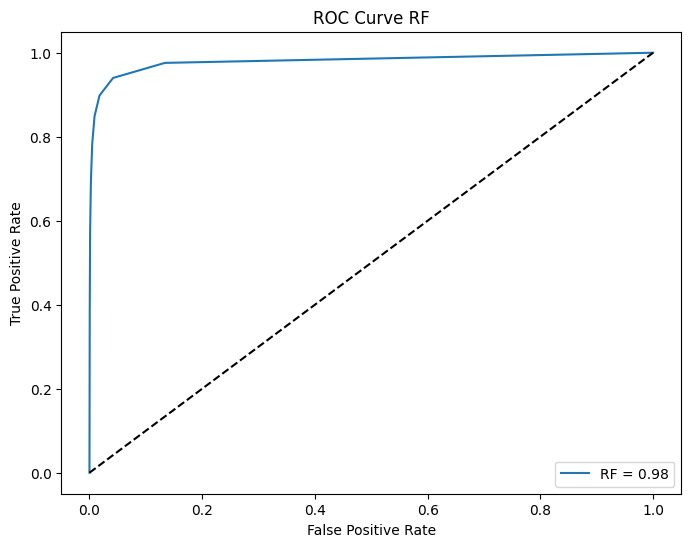

In [78]:
## Evaluation
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, rfpreds_mnist,average = 'macro')
recall = recall_score(y_test, rfpreds_mnist,average = 'macro')
f1 = f1_score(y_test, rfpreds_mnist,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,rfpreds_mnist)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_rf = finalmodel_rf.predict_proba(x_pca_test_trans)
fpr_rf,tpr_rf,thersholds_rf = roc_curve(y_test_bin.ravel(),predict_proba_rf.ravel())
auc = auc(fpr_rf,tpr_rf)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'RF = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RF')
plt.legend(loc='lower right')
plt.show()

## Naive Bayes

Precision: 0.8158876459995179
Recall: 0.8128
F1-score: 0.8115395884906883
Confusion Matrix:
[[643 235  19  33  11   0   2   9  40   8]
 [ 11 838   4  69  11   5   0   3  45  14]
 [ 11   1 977   3   0   4   2   1   0   1]
 [ 16  11   1 822  26  18  18  88   0   0]
 [  0   0   1  13 882  32   3  28  32   9]
 [  0   2   4  21 155 771   7  18  19   3]
 [  6   5  38  13  25  40 808  50   0  15]
 [ 12   7   7  50  28   2 176 701   5  12]
 [ 85  25  22   3   4   5   3   1 847   5]
 [  8   9   1   1  22   0  10   8 102 839]]
AUC: 0.97802107


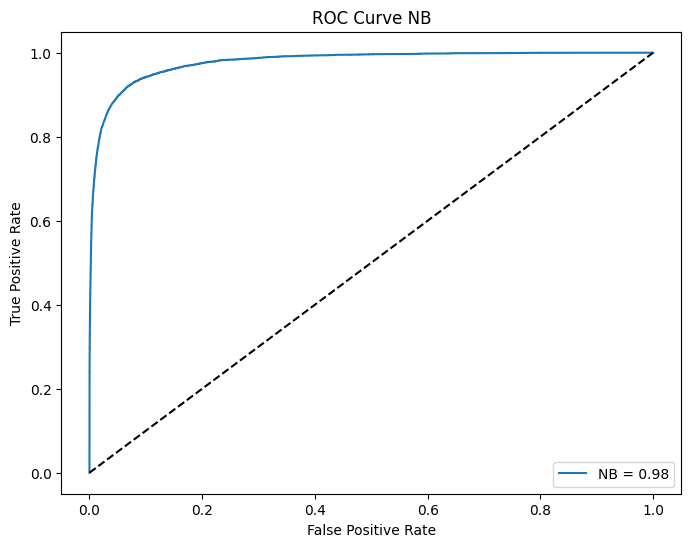

In [79]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_pca_train_trans, y_train)

predictions_nb = naive_bayes.predict(x_pca_test_trans)

## Evaluation

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions_nb,average = 'macro')
recall = recall_score(y_test, predictions_nb,average = 'macro')
f1 = f1_score(y_test, predictions_nb,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,predictions_nb)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_rf = naive_bayes.predict_proba(x_pca_test_trans)
fpr_nb,tpr_nb,thersholds_nb = roc_curve(y_test_bin.ravel(),predict_proba_rf.ravel())
auc = auc(fpr_nb,tpr_nb)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'NB = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve NB')
plt.legend(loc='lower right')
plt.show()


## SVM

Precision: 0.9415636045487682
Recall: 0.9400999999999999
F1-score: 0.9397847636982883
Confusion Matrix:
[[862 112   0  10   3   0   0   2   7   4]
 [  7 973   0   9   2   0   1   0   5   3]
 [  3   0 988   4   1   1   1   1   1   0]
 [  5   5   2 930  14  17   6  21   0   0]
 [  1   0   0   9 971   6   4   1   2   6]
 [  0   0   0   3  63 925   2   4   3   0]
 [  1   0   0   5  16   6 948   8   0  16]
 [ 17   3   0  17  14   2  65 847   1  34]
 [  5   0   0   0   1   4   0   0 989   1]
 [  4   8   0   0   3   0   2   0  15 968]]
AUC: 0.97802107


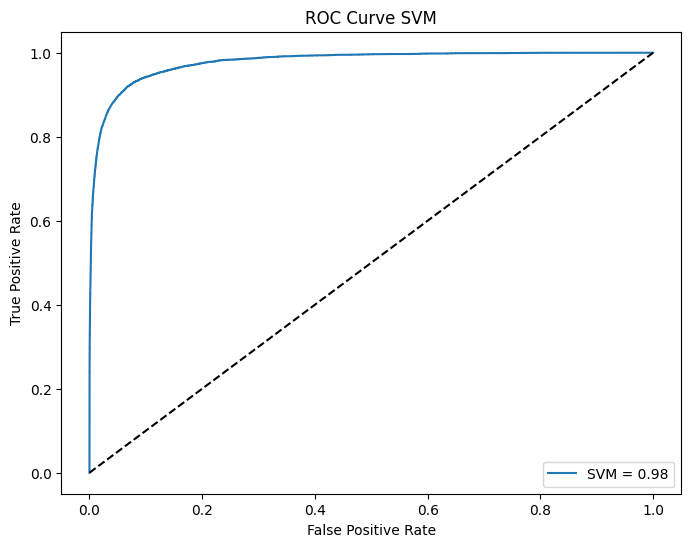

In [80]:
from sklearn.svm import SVC

svc_mnist= SVC(probability = True)
svc_mnist.fit(x_pca_train_trans, y_train)
predictions_svc = svc_mnist.predict(x_pca_test_trans)

## Evaluation
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions_svc,average = 'macro')
recall = recall_score(y_test, predictions_svc,average = 'macro')
f1 = f1_score(y_test, predictions_svc,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,predictions_svc)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_svc = svc_mnist.predict_proba(x_pca_test_trans)
fpr_svc,tpr_svc,thersholds_svc = roc_curve(y_test_bin.ravel(),predict_proba_rf.ravel())
auc = auc(fpr_svc,tpr_svc)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, label=f'SVM = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SVM')
plt.legend(loc='lower right')
plt.show()